## __Preliminary Analysis__ 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols
import matplotlib.ticker as ticker

In [3]:
corruption_df=pd.read_stata("corruptiondata.dta")
print(corruption_df.info())
print(corruption_df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 476 entries, 0 to 475
Columns: 116 entries, uf to esample2
dtypes: float32(48), float64(7), int16(1), int32(1), int8(58), object(1)
memory usage: 148.9+ KB
None
         nsorteio   totrecursos      tot_os            pop        purb  \
count  476.000000  4.760000e+02  451.000000     476.000000  476.000000   
mean     6.897059  5.566446e+06   42.031042   25417.367647    0.601536   
std      2.799983  8.532342e+06   19.611650   40595.987128    0.230635   
min      2.000000  8.296480e+04   14.000000    1270.000000    0.118746   
25%      4.000000  1.432963e+06   29.000000    7824.000000    0.419877   
50%      7.000000  2.852640e+06   36.000000   14049.000000    0.609153   
75%      9.000000  5.738083e+06   50.000000   26214.250000    0.810575   
max     11.000000  9.582892e+07  140.000000  449476.000000    1.000000   

       p_secundario      cod_ibge6  pib_capita_02    op_01_04    reeleito  \
count    476.000000     476.000000     476.00

In [ ]:
key_vars = ['pcorrupt', 'ncorrupt_os', 'valor_corrupt']
print(corruption_df[key_vars].describe())

         pcorrupt  ncorrupt_os  valor_corrupt       first
count  476.000000   476.000000   4.760000e+02  476.000000
mean     0.063007     0.052944   2.573789e+05    0.567227
std      0.101719     0.052353   5.721196e+05    0.495981
min      0.000000     0.000000   0.000000e+00    0.000000
25%      0.000000     0.013795   0.000000e+00    0.000000
50%      0.020127     0.040000   6.628117e+04    1.000000
75%      0.076568     0.074074   2.677460e+05    1.000000
max      0.793582     0.322581   6.113400e+06    1.000000


In [8]:
grouped_stats = corruption_df.groupby('first').agg({
    'pcorrupt': ['mean', 'std'],
    'ncorrupt_os': ['mean', 'std'],
    'valor_corrupt': ['mean', 'std']
}).reset_index()

print(grouped_stats)

  first  pcorrupt           ncorrupt_os            valor_corrupt  \
             mean       std        mean       std           mean   
0   0.0  0.073672  0.105368    0.057275  0.051828  307730.906250   
1   1.0  0.054871  0.098264    0.049640  0.052605  218962.140625   

                  
             std  
0  677101.531192  
1  474521.825969  


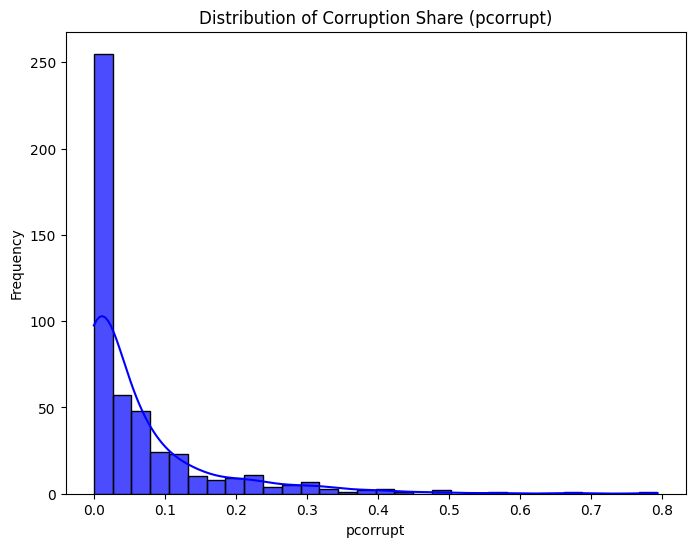

/var/folders/j2/kdbytjmd57914f_8rxw949240000gn/T/ipykernel_66179/538151589.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='first', y='pcorrupt', data=corruption_df, palette='Set2')


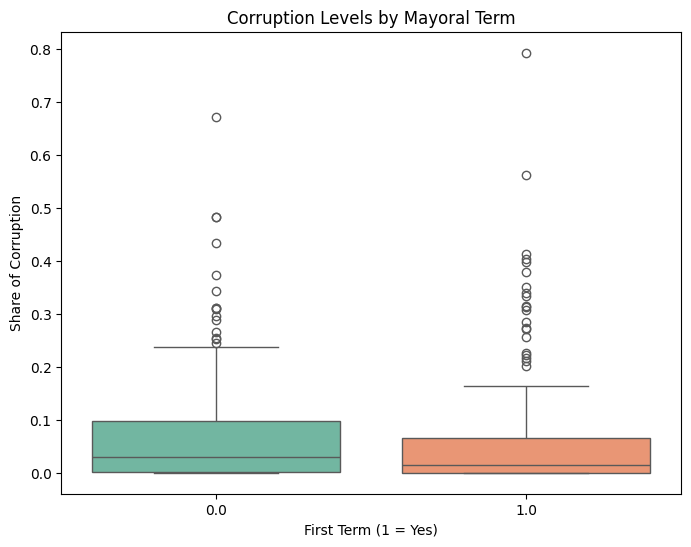

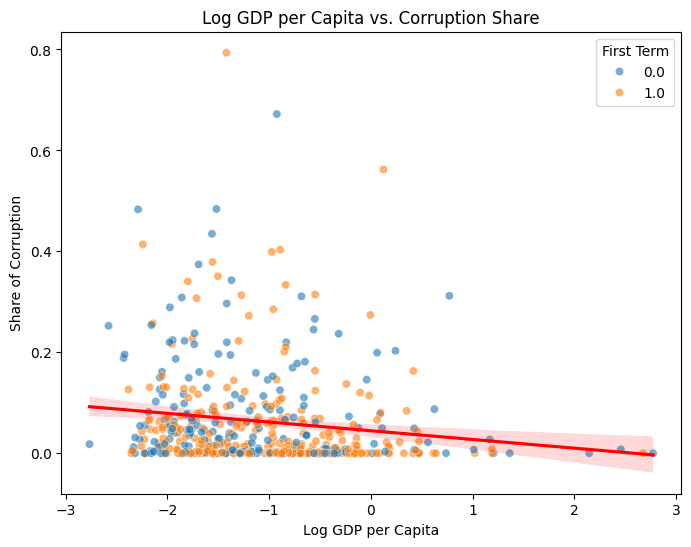

In [12]:
import matplotlib.ticker as ticker

# Histogram of corruption measures
plt.figure(figsize=(8, 6))
sns.histplot(corruption_df['pcorrupt'], bins=30, kde=True, color='blue', alpha=0.7)
plt.title('Distribution of Corruption Share (pcorrupt)')
plt.xlabel('pcorrupt')
plt.ylabel('Frequency')
plt.show()

# Boxplot of corruption measures by treatment
plt.figure(figsize=(8, 6))
sns.boxplot(x='first', y='pcorrupt', data=corruption_df, palette='Set2')
plt.title('Corruption Levels by Mayoral Term')
plt.xlabel('First Term (1 = Yes)')
plt.ylabel('Share of Corruption')
plt.show()

# Scatterplot of a covariate (e.g., log_gdp_pc) vs. corruption
plt.figure(figsize=(8, 6))
sns.scatterplot(x='lpib02', y='pcorrupt', hue='first', data=corruption_df, alpha=0.6)
sns.regplot(x='lpib02', y='pcorrupt', data=corruption_df, scatter=False, color='red')
plt.title('Log GDP per Capita vs. Corruption Share')
plt.xlabel('Log GDP per Capita')
plt.ylabel('Share of Corruption')
plt.legend(title='First Term')
plt.show()
